# Modeling The Ecology of Lyme Disease Transmission
**by** *Mervin Keith Cuadera*
</br>
Link to the Github project [here](https://github.com/mcuadera/data-projects/tree/main/lyme-model)

### Introduction
Lyme disease is the most common vector-borne disease in the United States. Every year, 476,000 cases are diagnosed and treated for it ([Kugeler et al. 2021](https://wwwnc.cdc.gov/eid/article/27/2/20-2731_article)). The primary causative agent is the *Borrelia burgdorferi* bacteria. The bacteria is primarily spread through the bite of *Ixodes scapularis* (black-legged) ticks in Eastern U.S. (**Figure 1**). 

<img src=https://upload.wikimedia.org/wikipedia/commons/3/34/Adult_deer_tick.jpg width=250/>

**Figure 1.** *Image of an adult Ixodes scapularis tick.*

*B. burgdorferi* circulates within the small mammal population, with the white-footed mice (**Figure 2**) cited as the primary reservoir of the bacteria. White-footed mice are often bit by larval and nymphal ticks. 

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Captive-White-Footed-Mouse.jpg/220px-Captive-White-Footed-Mouse.jpg width=250/>

**Figure 2.** *The white-footed mice is the primary carrier of the Lyme bacteria.*

Adult ticks usually bite larger mammals including humans and white-tailed deer (**Figure 3**). When humans and white-tailed deer are bit by an infected tick, if they do not remove the tick within a specified time, they may become infected. However, larger mammals are not reservoirs of the disease. Instead, they are thought to be the primary way ticks get transported from one area to another.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Deer_female_in_wild.jpg/440px-Deer_female_in_wild.jpg width=250 />

**Figure 3.** *The white-tailed deer is thought to be important for spreading ticks and Lyme disease.*

In the scientific community, there is a growing debate on which animal population has a greater impact on Lyme Disease spread. Some argue that the increase in Lyme Disease cases is mostly caused by the growth of the deer population. However, others believe that small mammalian hosts rather than large mammalian hosts have the greatest influence in the density of infected nymphs (DIN), and consequently Lyme disease risk. 

To determine which factors have the greatest influence, [Levi et al. (2012)](https://www.pnas.org/doi/10.1073/pnas.1204536109) created a biological model to look at several parameters that influence Lyme Disease spread (**Figure 4**).

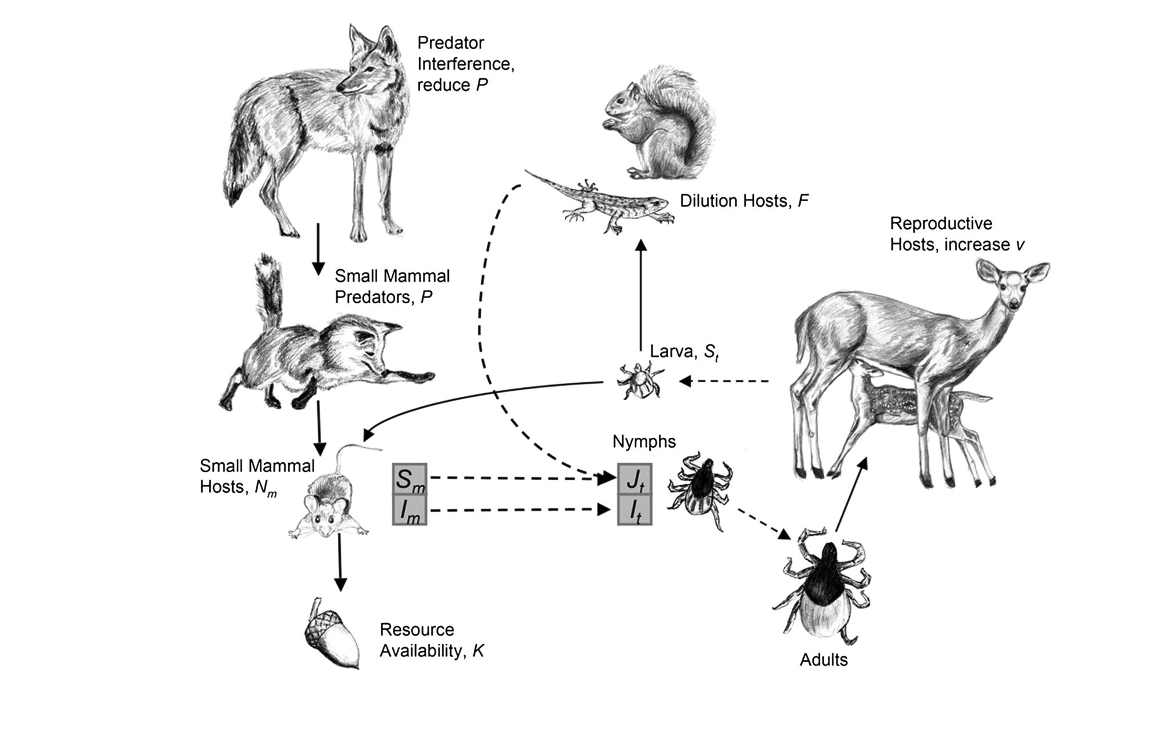

**Figure 4.** *Simplified diagram of ecological interactions for Lyme disease. Figure taken from Levi et al. (2012).*

Specifically, they looked at how varying the densities of alternative hosts, primary hosts and predators impacted the densities of infected ticks. 

They had two main objectives: 
1) Look at how small-mammal predation intensity, such as foxes, impact the prevalence of infected ticks. 
2) Determine which population between coyote, fox and deer is better correlated spatially and temporally with Lyme Disease prevalence.


### Project Goal
The researchers found that predator density and predation intensity have a strong influence on the density and infection of ticks. However, deer abundance was a poor predictor of tick abundance even when deer populations declined significantly. 

They also found that nymphal infection prevalence is weakly influenced by tick birth rate. Lastly, they looked at a situation where adult feeding rates were saturated and found that the key driver for density and prevalence of infected nymphs depended on immature tick hosts such as the white-footed mice.

The focus of the current project is in extending the work of [Levi et al. (2012)](https://www.pnas.org/doi/10.1073/pnas.1204536109). Specifically, I am looking at how changing the densities of dilution hosts impact infected nymph densities across different predation rates. Dilution hosts are animals that are not primary hosts of *I. scapularis* ticks, such as lizards. They are referred to as *F* in **Figure 4**.

My approach of determining how the density of dilution hosts influence the number of infected nymphs at different predation rates is by graphing the infected nymph densities by their respective dilution host densities (ranging from 1000-9000) while keeping the tick birth rate at 1 million larvae per km2 annually. I define low predation rate as 2000, medium predation rate at 6000 and high predation rate at 8000.

### Defining The System of Differential Equations From The Paper
The ecological interactions can be modeled as follows:

Host population

$\frac{dN}{dt}= rN_m(1-\frac{N_m}{K})-\frac{aP{N^2_m}}{c^2 + N^2_m}$

Susceptible small-mammal host population

$\frac{dS_m}{dt}= rN_m(1-\frac{N_m}{K})-\frac{T_{mt}I_tS_m}{b_0 + N_m +F_{alt}} - S_m\frac{aPN_m}{c^2+N^2_m}$

Infected small-mammal host population

$\frac{dI_m}{dt}= \frac{T_{mt}I_tS_m}{b_0 + N_m +F_{alt}} - I_m\frac{aPN_m}{c^2+N^2_m}$

Susceptible larval tick population

$\frac{dS_t}{dt}= v - \frac{N_m+F}{b_0 + N_m +F}S_t - \mu_LS_t$

Infected nymph population

$\frac{dI_t}{dt}= \frac{T_{mt}I_mS_t}{b_0 + N_m +F} -\frac{N_m + F}{b_0+N_m+F_{alt}}I_t - \mu_NI_t$

Uninfected nymph population

$\frac{dJ_t}{dt}= \frac{S_m + F_{alt} + I_m(1-T_{tm})}{b_0 + N_m +F}S_t -\frac{N_m + F_{alt}}{b_0+N_m+F_{alt}}J_t - \mu_NJ_t$

In general, these equations describe how each population interact and influence each other. I have provided a gentle introduction to the concepts related to ecological modeling in the **Appendix** section. Additionally, the Methods section of the original paper provides additional explanation for how the author built these equations.

### Defining The Parameters
The paper has a host-vector dynamic model to look at how changing predation intensity affect Lyme Disease risk. They had six differential equations with 11 parameters. **Table 1** describes the parameters the researchers used, which can be downloaded from the Supporting Information section of the original paper.

**Table 1**. Parameters used for the model.

| Parameters |                                   Interpretation                                  |        Value        |
|:----------:|:---------------------------------------------------------------------------------:|:-------------------:|
|    $\mu_1, \mu_n$        | Mortality rate of larva and nymphs                                                | 0.2                 |
|    $F$        | Density of dilution hosts                                                         | 4,120               |
|    $b_0$        | Half-saturation parameter of tick functional response                             | 80,000              |
|     $aP$       | Asymptotic number of hosts killed annually by predators with population, P        | 1,000-9,000         |
|      $c$      | Mouse population where the predation rate reaches half of the maximum             | 2,500               |
|     $T_{mt}$       | Probability that an infected tick biting a susceptible host transmits Borrelia    | 0.9                 |
|     $t_{tm}$       | Probability that an infected host bitten by a susceptible tick transmits Borrelia | 0.9                 |
|     $r$       | Maximum intrinsic growth rate of hosts                                            | 2                   |
|      $K$     | Carrying capacity of hosts                                                        | 10,000              |
|      $v$      | Birth rate of larval ticks                                                        | 1.5, 1, 0.5 million |

### Creating The Model
The system of differential equations described above are specifically called ordinary differential equations (also known as ODEs). The `scipy` module will be used to integrate these functions and plot trajectories.

**Step 1: Defining The Equations**

Before building the model, the first step is to define the parameters (inputs that remain constant in the equations) and population. 

X = [N, S_m, I_m, S_t, I_t, J_t] will be used to describe the states of the populations.

**Explanation of parameters:**

`N_m+F_alt` is the total population of hosts

`r` is maximum intrinsic growth rate

`K` is carrying capacity (individuals)

`aP` is maximum predation rate (kills per km^2)  (**can be 1,000 - 9,000**)

`c` is half saturation parameter (this is just half of aP because this is the same as max_rate/2)

`T_mt` is probability of being biten by an infected nymph

`F_alt` fraction of ticks biting alternative hosts, but also increase total host abundance (individuals)

`beta` is the tick bite rate; (originally written as beta(Nm+F))

`b0` is half-saturation parameter representing the density of small mammals where half of ticks
would be expected to feed.

`v` is the birth rate (either **1, 1.5, 0.5 million** larva born per km^2 annually)

`mu_L` is the per-capita death rate of larval ticks

`mu_N` is the per-capita death rate of nymphal ticks

`T_tm` is the is successful infection of Borrelia from an infected hosts.

**Explanation of classes/state variables (differential equations):**

`N_m` is functional group of small mammal host density

`S_m` is susceptible small-mammal host population

`I_m` is infected small-mammal host population

`I_t` is the infected nymphs

`S_t` is the larval ticks, which are all susceptible

`J_t` is the uninfected nymphs

**Step 2: Coding the system of differential equations**

Now that the model parameters and state variables are defined, the next step is to then create a function that returns the growth rates (i.e., rate of change) of each of the populations defined above.

In [1]:
from numpy import *

In [2]:
# define the parameters
r=2
K=10000
aP=9000
c=2500
T_mt=0.9
F=4120
beta=0.10
b0=80000
v=1500000
mu_L=0.2
mu_N=0.2
T_tm=0.9

In [3]:
# set default state of N_m, S_m, I_m, S_t, I_t, J_t in that order
y0 = array([1, 1, 1, 1, 1, 1])

In [4]:
def dX_dt(X,t):
    
    ''' Returns the growth rates of each population'''
    
    dX = list([0] * 6) # initialize a container for the diff equations
    dX[0] = r * X[0] * (1 - X[0] / K) - (aP * X[0]**2)/(c**2 + X[0]**2)
    dX[1] = (r * X[0] * (1 - X[0] / K) - (T_mt * X[4] * X[1]) / (b0 + X[0] + F) - 
             X[1] * ((aP * X[0]) / (c**2 + X[0]**2))
            )
    dX[2] = (T_mt * X[4] * X[1]) / (b0 + X[0] + F) - X[2] * (aP * X[0]) / (c**2 + X[0]**2) #X[2] 
    dX[3] = v - (X[0] + F) / (b0 + X[0] + F) * X[3] - mu_L * X[3]
    dX[4] = (T_tm * X[2] * X[3]) / (b0 + X[0] + F) - (X[0] + F) / (b0 + X[0] + F) * X[4] - mu_N * X[4]
    dX[5] = (((X[1] + F + X[2] * (1 - T_tm))/(b0 + X[0] + F)) * X[3] - 
             ((X[0] + F)/(b0 + X[0] + F) * X[5])- mu_N * X[5]
            )

    return array(dX)

### Integrating The Systems of Differential Equations
The final step is to integrate the ODEs and see the changes in growth rates over time. To this end, the `scipy.integrate` module is used. This module offers a method named `odeint`, which is used to integrate ODEs.

In [5]:
from scipy import integrate
t = linspace(0, 15, 1000) # time
X, infodict = integrate.odeint(dX_dt, y0, t, full_output=True)
infodict['message']  

'Integration successful.'

Now that I have successfully integrated the ODEs, the final step is to graph the evolution of all the populations.

In [6]:
N_m, S_m, I_m, S_t, I_t, J_t = X.T

### Population evolution in ticks

In [104]:
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

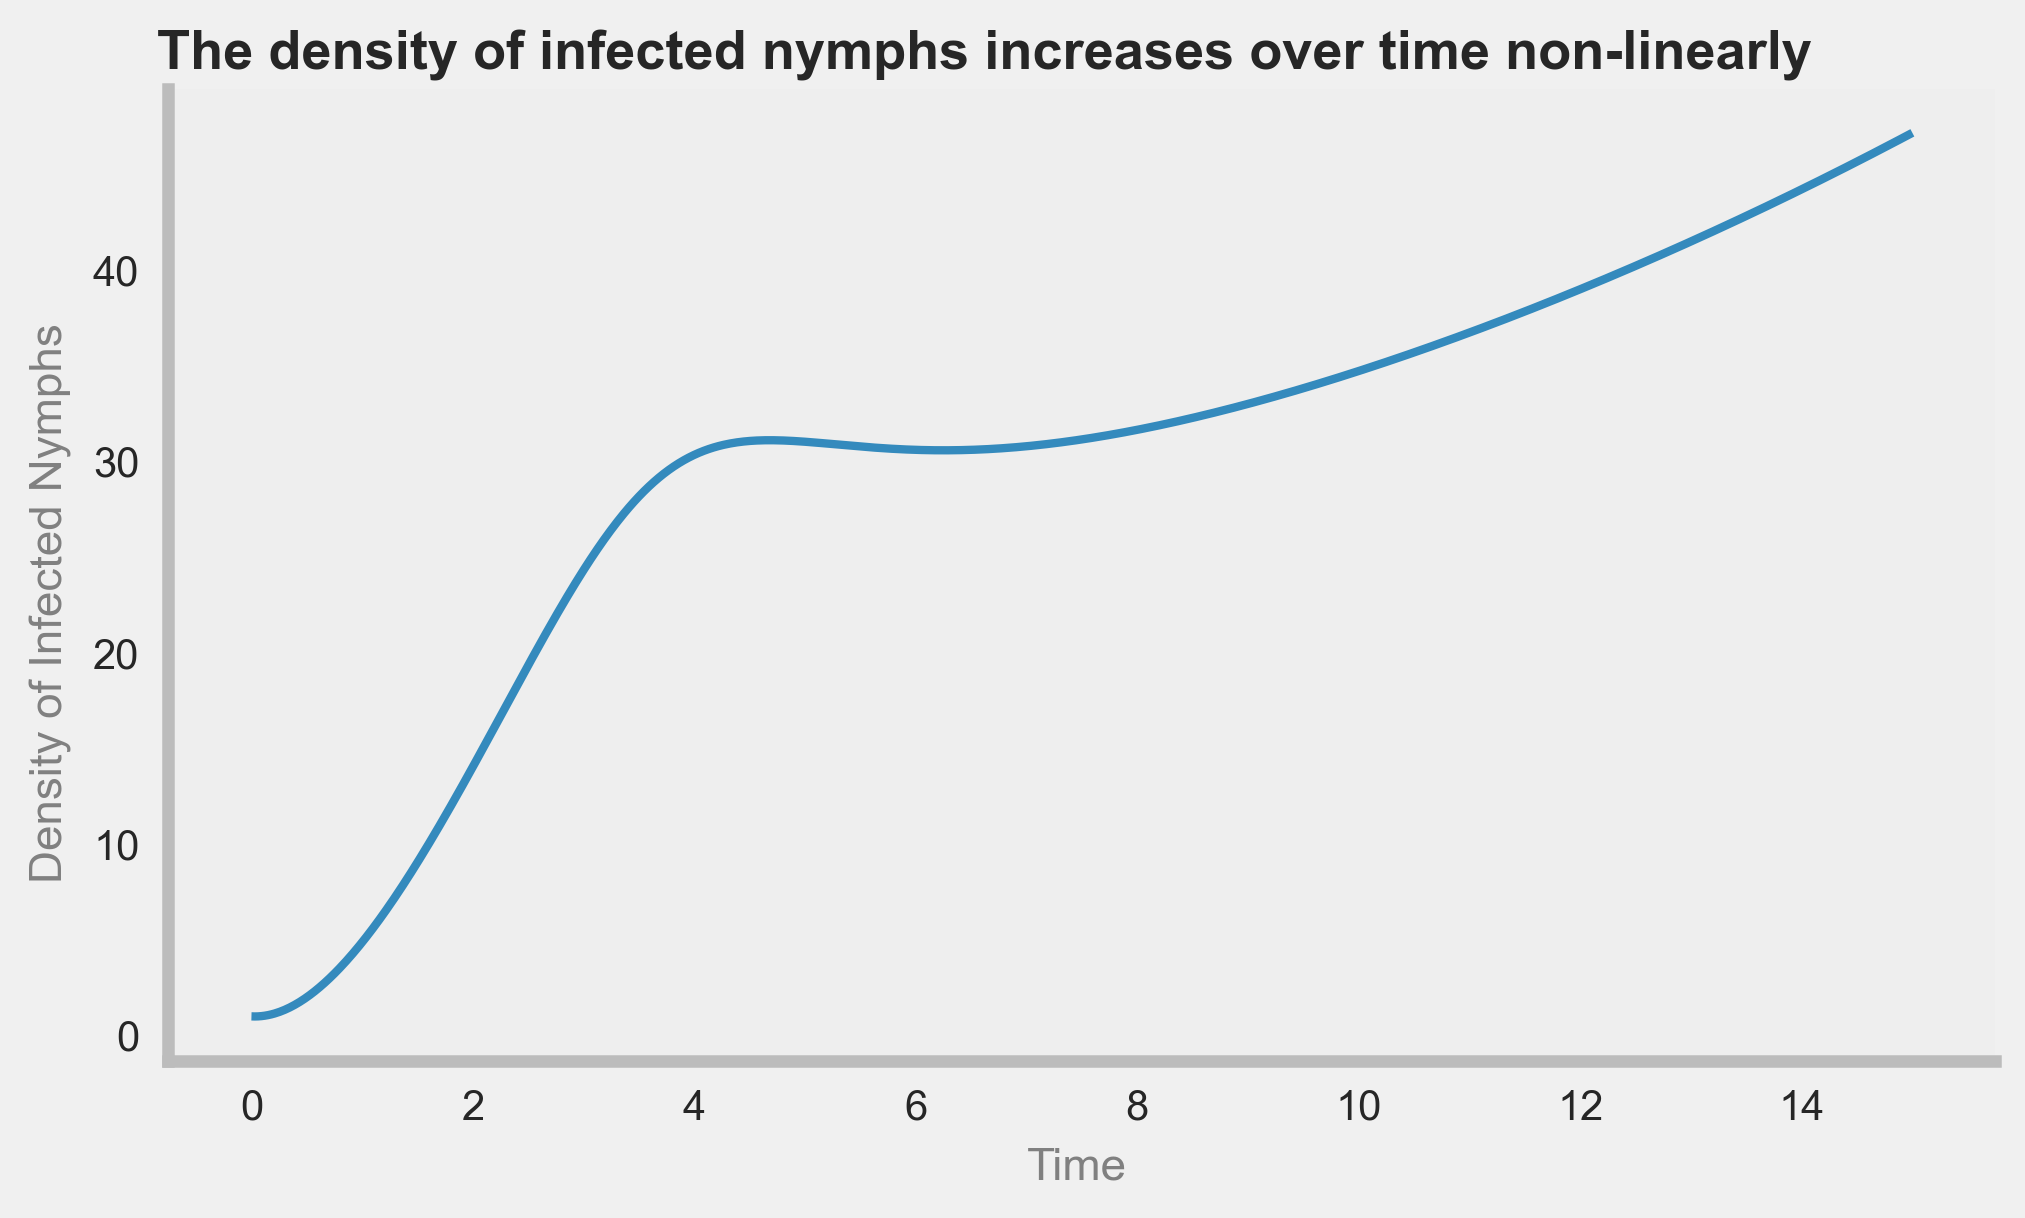

In [124]:
style.use('bmh')
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(t, I_t)
ax.text(-0.85, 50.5,
        'The density of infected nymphs increases over time non-linearly',
        size=13, weight='bold')
ax.text(-2, 8.5, 'Density of Infected Nymphs', size=11, color='grey', rotation = 90)
ax.text(7, -7.5, 'Time', size=11, color='grey')
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
p.show()

**Figure 5.** *The density of infected nymphs over time based on default model parameters.*

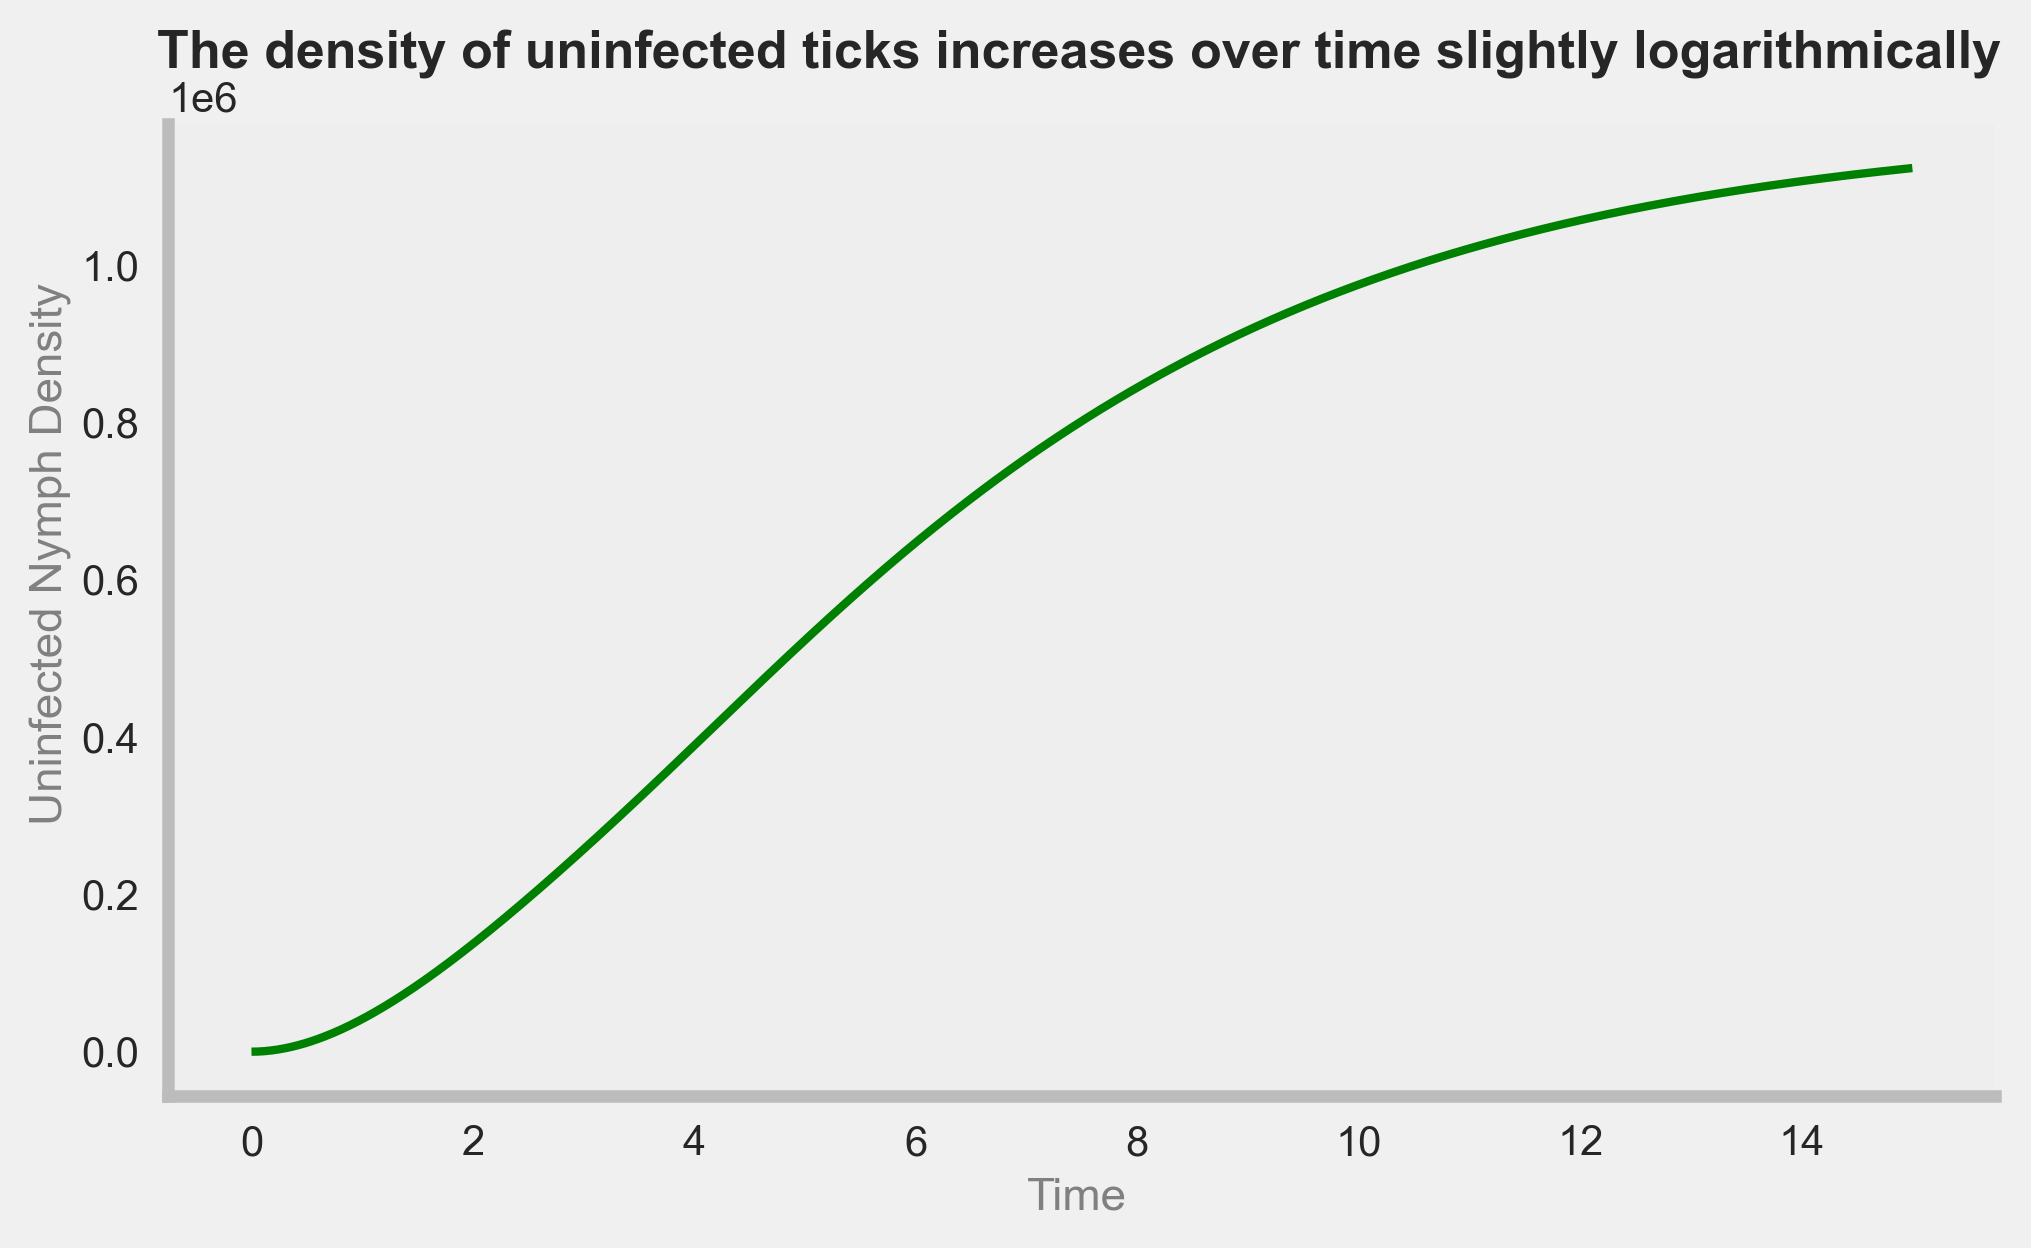

In [145]:
style.use('bmh')
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(t, J_t, color='green')
ax.text(-0.85, 1.25e6,
        'The density of uninfected ticks increases over time slightly logarithmically',
        size=12.5, weight='bold')
ax.text(-2, 0.3e6, 'Uninfected Nymph Density', size=11, color='grey', rotation = 90)
ax.text(7, -0.2e6, 'Time', size=11, color='grey')
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
p.show()

**Figure 6.** *The density of uninfected nymphs over time based on default model parameters.*

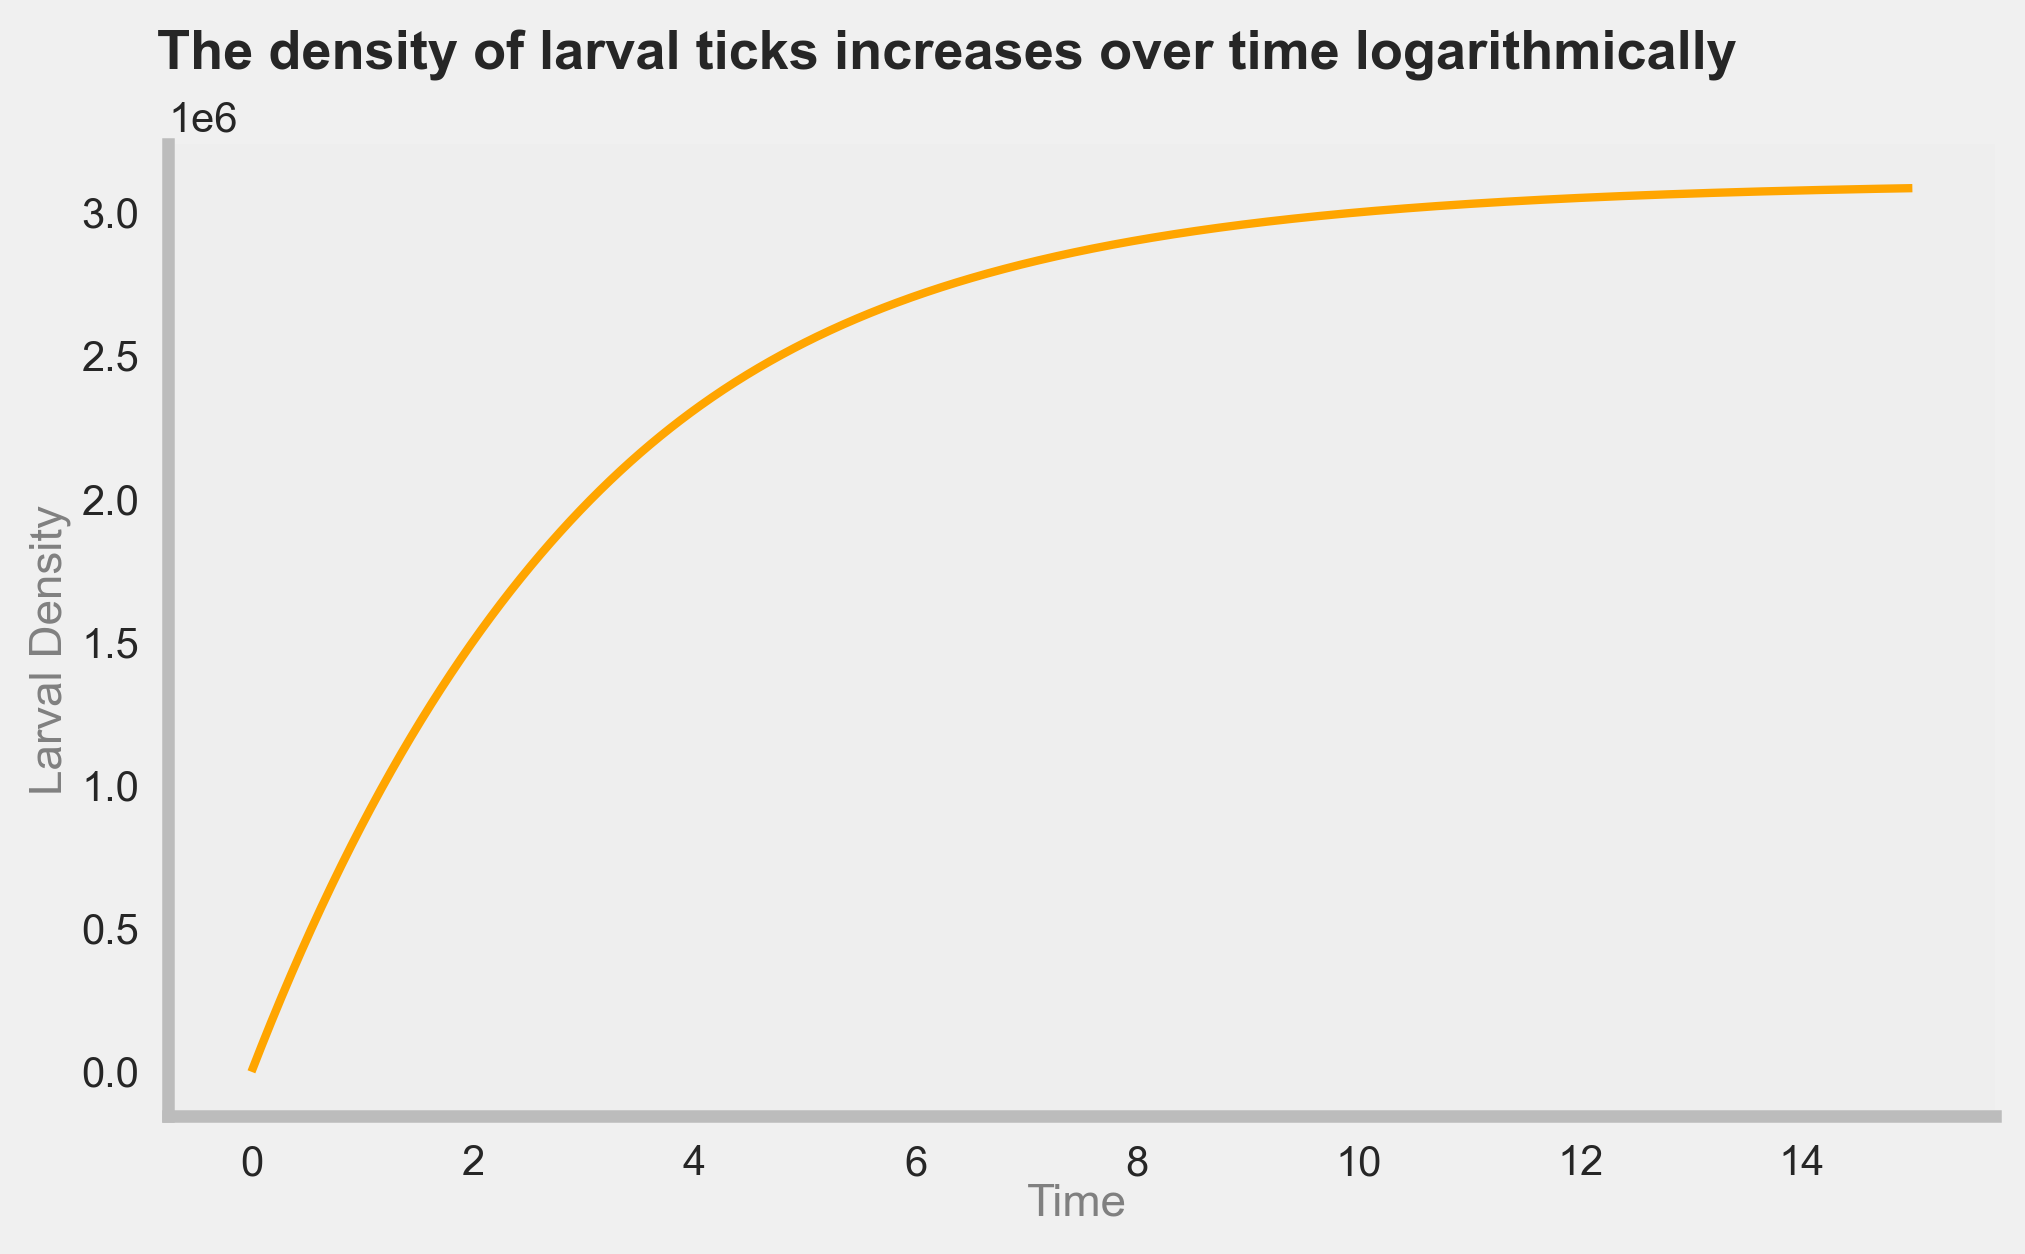

In [135]:
style.use('bmh')
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(t, S_t, color='orange')
ax.text(-0.85, 3.5e6,
        'The density of larval ticks increases over time logarithmically',
        size=13, weight='bold')
ax.text(-2, 1e6, 'Larval Density', size=11, color='grey', rotation = 90)
ax.text(7, -0.5e6, 'Time', size=11, color='grey')
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
p.show()

**Figure 7.** *The density of larvae over time based on default model parameters.*

The graph above shows how the tick population increases over time. The number of infected nymphs increases exponentially and tapers off after a while. Naturally, as the number of infected nymphs increase, so does the number of uninfected nymphs. When the population growth of the nymphal ticks start to taper off, the larval tick population starts to grow almost exponentially. Perhaps given a long enough time, the trends in larval population may look the same as the nymphal population.

Note that these results are based on a high predation rate (`aP`=9000). It would be interesting to see how reducing the predation rate impacts these results.

### Population evolution of hosts

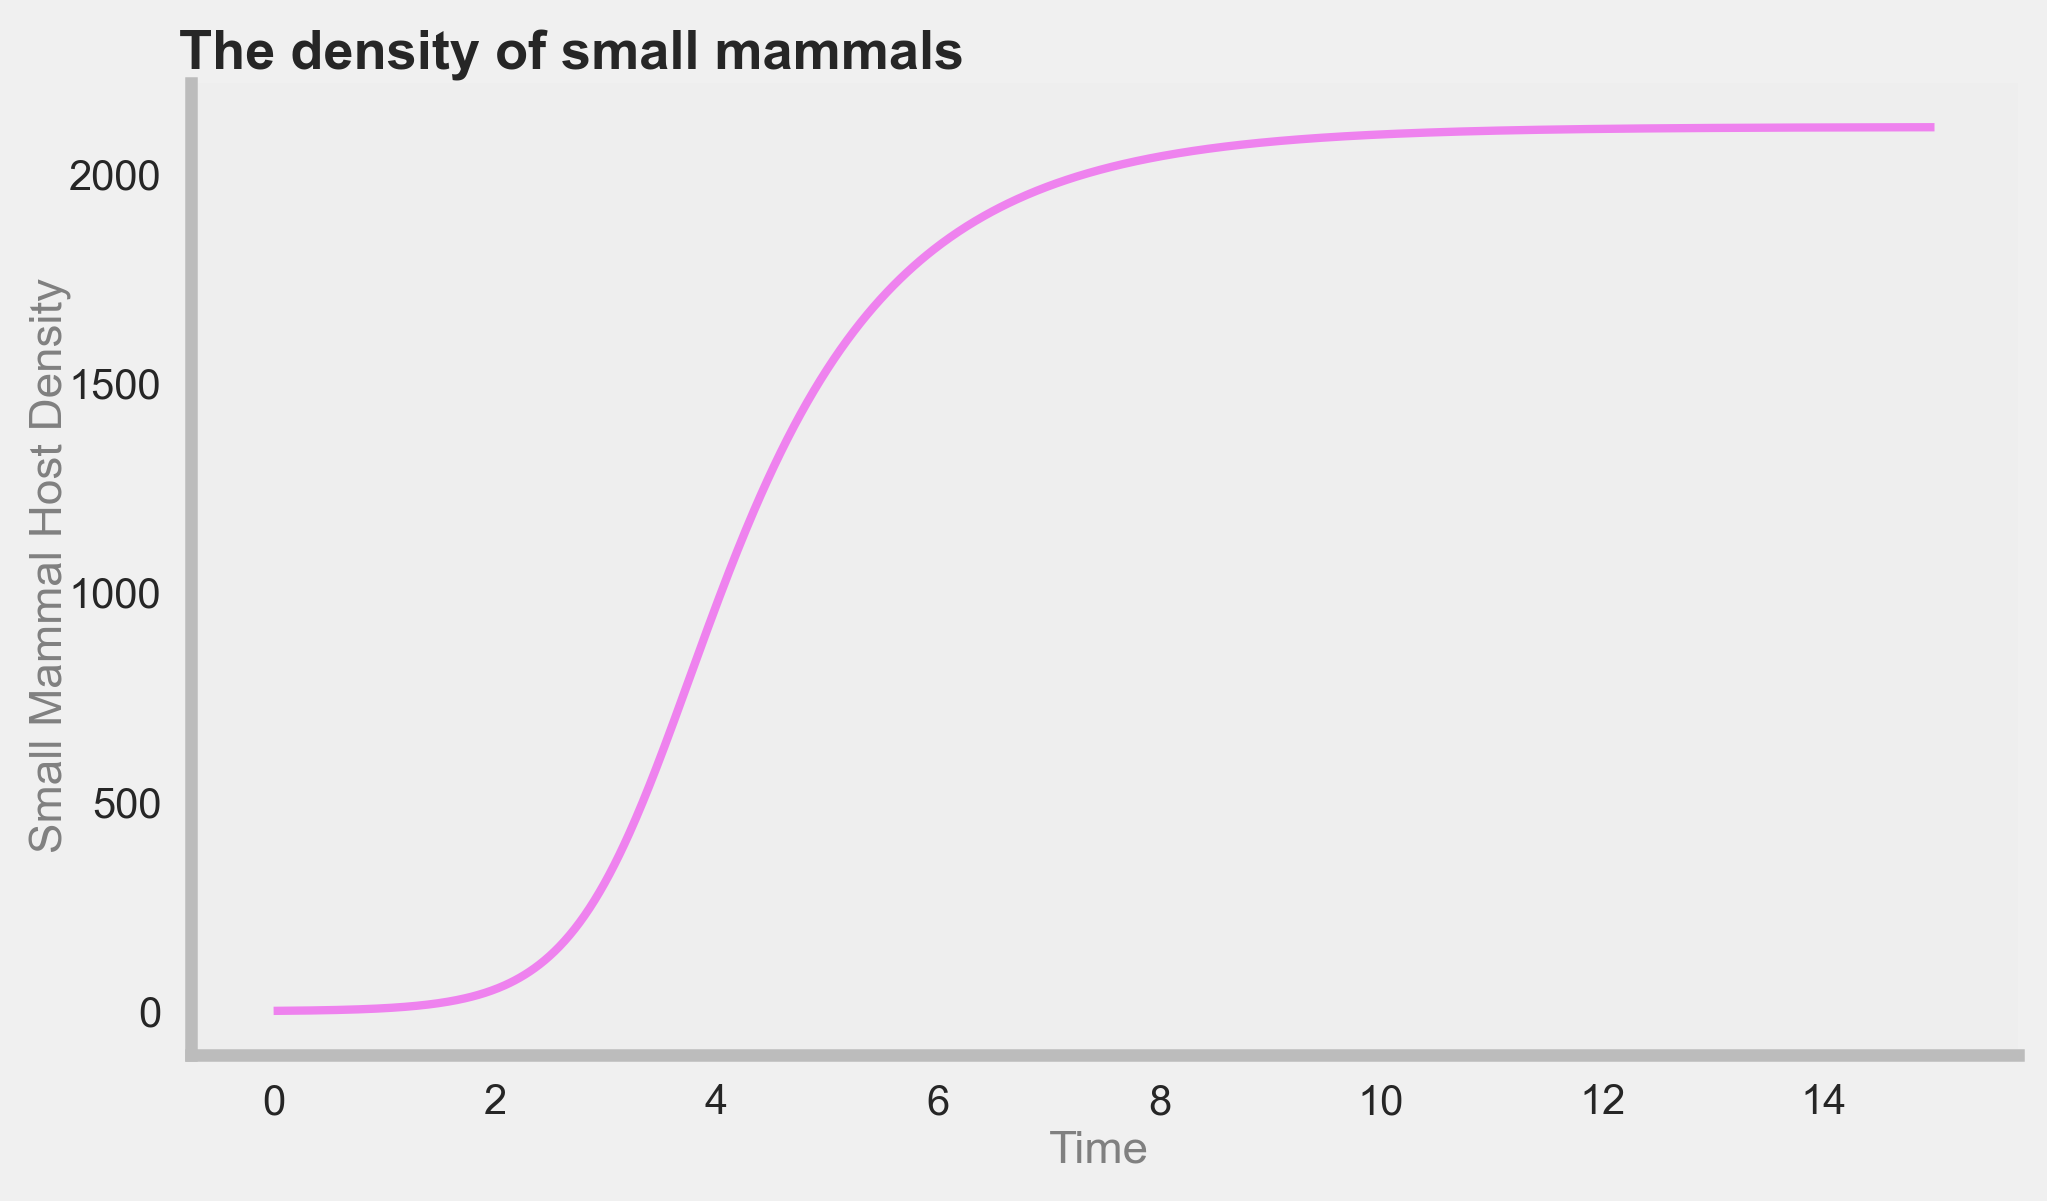

In [169]:
style.use('bmh')
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(t, N_m, color='violet')
ax.text(-0.85, 2250,
        'The density of small mammals',
        size=13, weight='bold')
ax.text(-2.2, 400, 'Small Mammal Host Density', size=11, color='grey', rotation = 90)
ax.text(7, -360, 'Time', size=11, color='grey')
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
p.show()

Around time step 6, it looks like the small mammal host density reaches its carrying capacity. This could explain why we saw the infected nymphal population taper around the same time.

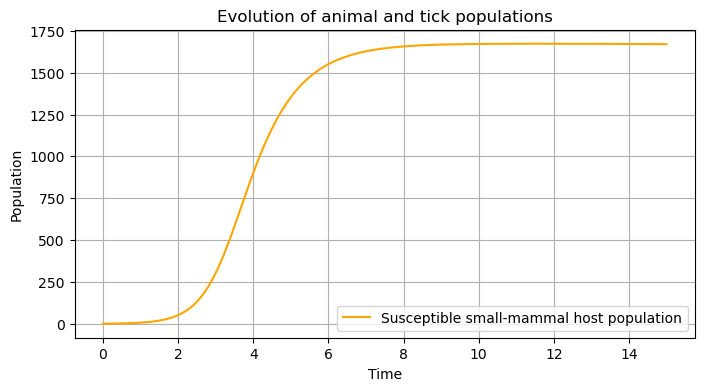

In [11]:
fig = p.figure(figsize=(8,4))
p.plot(t, S_m, label='Susceptible small-mammal host population', color='orange')
p.grid()
p.legend()
p.xlabel('Time')
p.ylabel('Population')
p.title('Evolution of animal and tick populations')
p.show()

Interestingly, the number of susceptible small-mammal population is almost similar to the small mammal host density graph. This makes sense since most of the population are non infected.

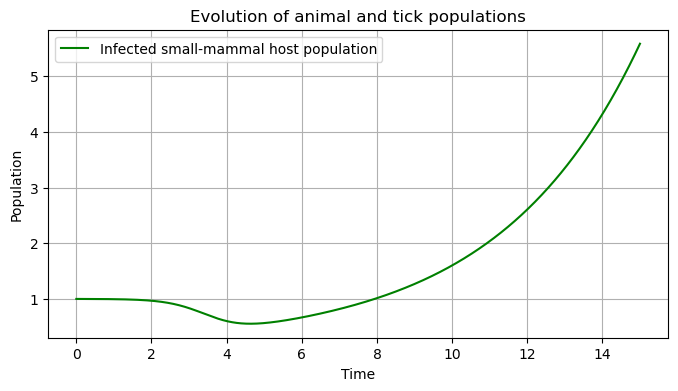

In [12]:
fig = p.figure(figsize=(8,4))
p.plot(t, I_m,label='Infected small-mammal host population', color='green')
p.grid()
p.legend()
p.xlabel('Time')
p.ylabel('Population')
p.title('Evolution of animal and tick populations')
p.show()

Naturally, as the number of susceptible increases, so does the number of infected hosts. However, unlike the other two graphs, we see that when the infected nymphal population reaches its carrying capacity, we see a significant increase in the number of infected small-mammal hosts. This indicates that as we approach the carrying capacity of the host population, we see that majority of the hosts become infected, given that the infected nymphal population remains equal.

From these initial results, it would be worth exploring how changing some of the parameters impact the number of infected nymphs in the population.

### Effect of predation rates on infected nymphal populations

One important parameter is predation rate of the mammalian host ($aP$). Seeing how varying this number may give additional insight on the results above.

In [13]:
pred_rates = []

for i in list(range(1000, 9001, 1000)):
    aP = i
    t = linspace(0, 15, 1000) # time
    X = integrate.odeint(dX_dt, y0, t)
    N_m, S_m, I_m, S_t, I_t, J_t = X.T
    pred_rates.append(I_t)

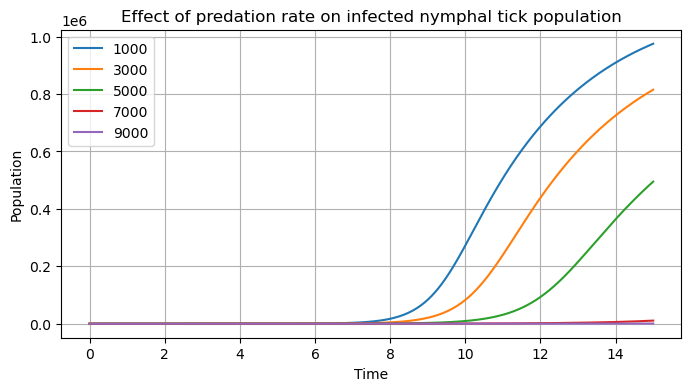

In [14]:
fig = p.figure(figsize=(8,4))
p.plot(t, pred_rates[0],label='1000')
p.plot(t, pred_rates[2], label='3000')
p.plot(t, pred_rates[4],label='5000')
p.plot(t, pred_rates[6],label='7000')
p.plot(t, pred_rates[8],label='9000')
p.grid()
p.legend()
p.xlabel('Time')
p.ylabel('Population')
p.title('Effect of predation rate on infected nymphal tick population')
p.show()

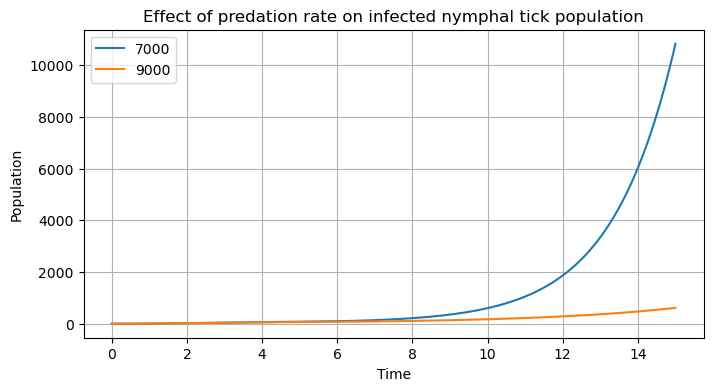

In [15]:
fig = p.figure(figsize=(8,4))
p.plot(t, pred_rates[6],label='7000')
p.plot(t, pred_rates[8],label='9000')
p.grid()
p.legend()
p.xlabel('Time')
p.ylabel('Population')
p.title('Effect of predation rate on infected nymphal tick population')
p.show()

Given a long enough time, the maximum number of infected nymphs is lower at high predation rates compared to low predation rates. However, in all predation levels, the number of infected nymphs increase over time but at different rates.

### Effect of predation rates on infected nymphs between several birth rates

In Figure 1B of the original paper, the researchers looked at how predation intensity affected nymphal densities between several tick birth rates. The dotted, solid, and dashed lines corresponds to ν = 1.5, 1, and 0.5 million larva born per km$^2$ per year, respectively.

<div>
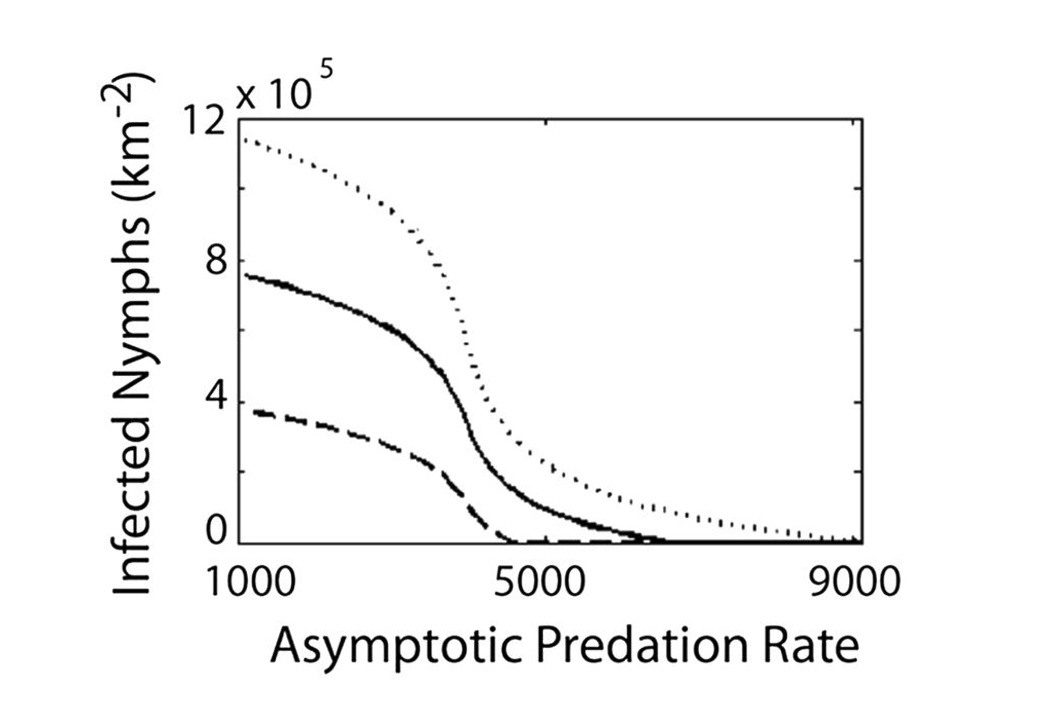
</div>

Based on the information given on the paper, it would be interesting to see if their work can be replicated, which is also a good way to check that our EODs are correct.

I first initialized three lists to contain the infected nymphal tick population as the predation intensity increases for each of the larval birth rates (which remain constant).

In [16]:
I_t_1_5 = [0] * 1001 #using v = 1.5 million
I_t_1 = [0] * 1001 #using v = 1 million
I_t_500 = [0] * 1001 #using v = 500 million

Then, I created several aP values (max predation rate). The paper varied aP from 1,000-9,000. I used 1000 as the initial starting point, then created several aP values.

In [17]:
aP_val = range(1000, 9001, 8)

**Generating values for v = 1.5 million**

In [18]:
v = 1500000

for i in range(0, len(aP_val)):
    aP = aP_val[i]
    X = integrate.odeint(dX_dt, y0, t)
    N_m, S_m, I_m, S_t, I_t, J_t = X.T
    I_t_1_5[i] = I_t[-1]

**Generating values for v = 1 million**

In [19]:
v = 1000000

for i in range(0, len(aP_val)):
    aP = aP_val[i]
    X = integrate.odeint(dX_dt, y0, t)
    N_m, S_m, I_m, S_t, I_t, J_t = X.T
    I_t_1[i] = I_t[-1]

**Generating values for v = 0.5 million**

In [20]:
v = 500000

for i in range(0, len(aP_val)):
    aP = aP_val[i]
    X = integrate.odeint(dX_dt, y0, t)
    N_m, S_m, I_m, S_t, I_t, J_t = X.T
    I_t_500[i] = I_t[-1]

**Graphing the results**

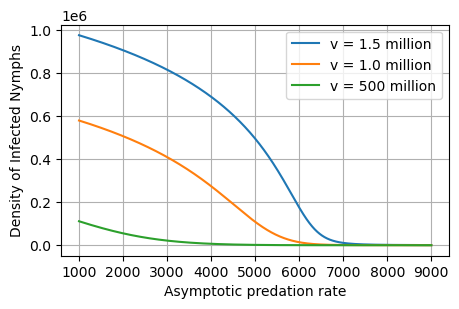

In [21]:
fig = p.figure(figsize=(5, 3))
p.plot(aP_val, I_t_1_5, label='v = 1.5 million')
p.plot(aP_val, I_t_1, label='v = 1.0 million')
p.plot(aP_val, I_t_500, label='v = 500 million')
p.grid()
p.legend()
p.xlabel('Asymptotic predation rate')
p.ylabel('Density of Infected Nymphs')
p.show()

<div>
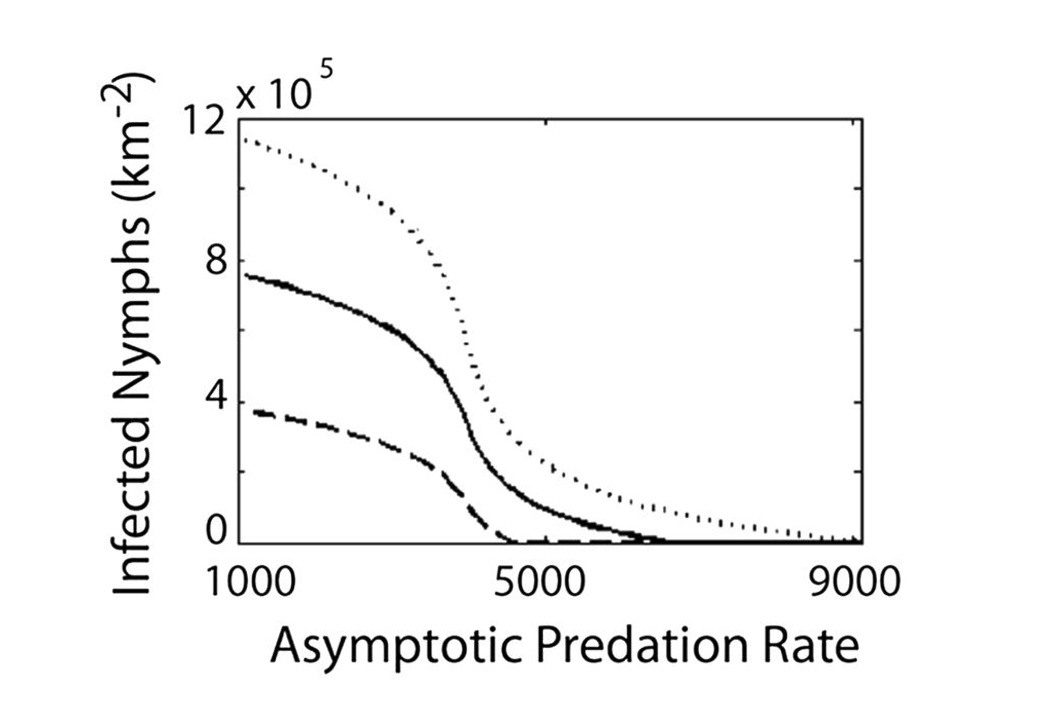
</div>

*Fig 1B of the paper*

In the original paper, the caption for Figure 1B was: 
>*...the model reveals a sharp nonlinear increase in the density of infected nymphs (DIN) and (C) nymphal infection prevalence (NIP) as the maximum predation rate (predator density × their consumption rate as prey increase to infinity) declines.*

Our graph shows that the DIN *increases* as the max predation rate * decreases*. Additionally, at low predation dates, we similarly see that higher birth rates also lead to higher density of infected nymphs.

While the overall shape of the graph are similar, they do have their differences. Firstly, it was unclear what exact parameters the authors used. What we know is that $aP$ is varied. What we don't know is how many time steps they use, and whether or not they used different values of the parameters than the one they stated.

### Effect of dilution hosts on the number of infected nymphs
Extending the original paper's work, I will graph the density of infected nymphs $I_t$ as a function of dilution host density ($F$) across three different predation rates ($aP$). I define low predation rates as 2000, medium as 6000, and high as 8000. The larval birth rate is also kept constant at 1 million.

First, I initialized three lists to contain the infected nymphal tick population as the dilution host increases for each of the predation rates (which remain constant).

In [28]:
f_l = [0] * 1001
f_m = [0] * 1001
f_h = [0] * 1001

In [29]:
v = 1000000
F_val = range(1000, 9001, 8)

**Generating values for $aP$ = 2000**

In [30]:
aP = 2000

for i in range(0, len(F_val)):
    F = F_val[i]
    X = integrate.odeint(dX_dt, y0, t)
    N_m, S_m, I_m, S_t, I_t, J_t = X.T
    f_l[i] = I_t[-1]

**Generating values for $aP$ = 6000**

In [31]:
aP = 6000

for i in range(0, len(F_val)):
    F = F_val[i]
    X = integrate.odeint(dX_dt, y0, t)
    N_m, S_m, I_m, S_t, I_t, J_t = X.T
    f_m[i] = I_t[-1]

**Generating values for $aP$ = 8000**

In [32]:
aP = 8000

for i in range(0, len(F_val)):
    F = F_val[i]
    X = integrate.odeint(dX_dt, y0, t)
    N_m, S_m, I_m, S_t, I_t, J_t = X.T
    f_h[i] = I_t[-1]

**Graphing the results**

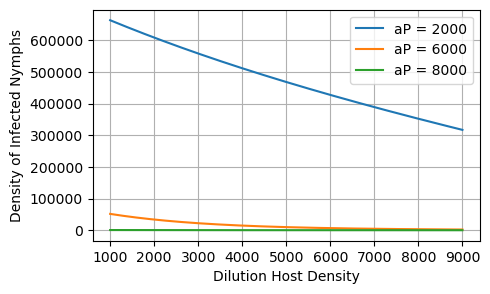

In [39]:
fig = p.figure(figsize=(5, 3))
p.plot(F_val, f_l, label='aP = 2000')
p.plot(F_val, f_m, label='aP = 6000')
p.plot(F_val, f_h, label='aP = 8000')
p.grid()
p.legend()
p.xlabel('Dilution Host Density')
p.ylabel('Density of Infected Nymphs')
p.show()

The graph above doesn't show medium and high predation rates well, so they should be viewed more granularly. However, looking at the overall picture, it is clear that the number of infected nymphs is signficantly higher at lower population density compared to medium and high predation rates. Biologically, this means that nymphs are more likely to encounter infected hosts since the number of infected hosts is greater due to low predation.

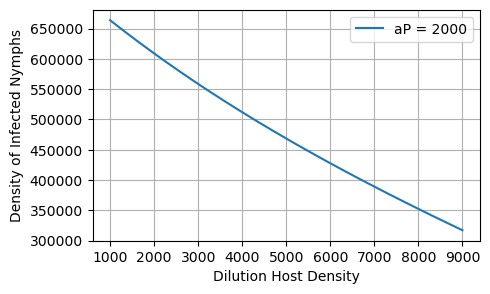

In [38]:
fig = p.figure(figsize=(5, 3))
p.plot(F_val, f_l, label='aP = 2000')
p.grid()
p.legend()
p.xlabel('Dilution Host Density')
p.ylabel('Density of Infected Nymphs')
p.show()

At low predation rates, the density of infected nymphs is linearly and inversely proportional to the dilution host density. Since infected nymphs become infected when they bite an infected primary host, increasing the number of dilution hosts could reduce the number of infected nymphs in the population.

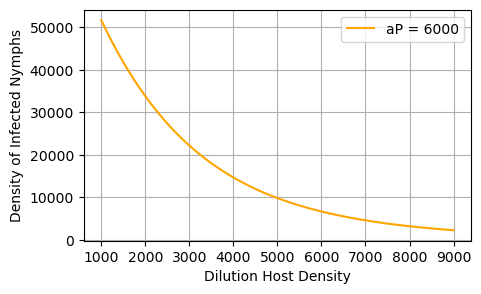

In [36]:
fig = p.figure(figsize=(5, 3))
p.plot(F_val, f_m, label='aP = 6000', color='orange')
p.grid()
p.legend()
p.xlabel('Dilution Host Density')
p.ylabel('Density of Infected Nymphs')
p.show()

At medium predation rates, the density of infected nymphs exhibit a somewhat exponential decrease.

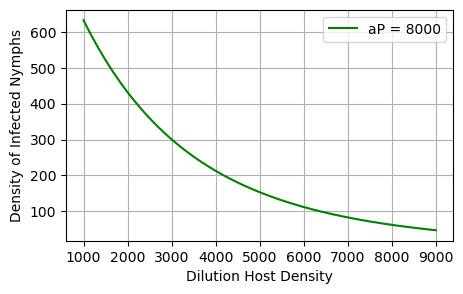

In [37]:
fig = p.figure(figsize=(5, 3))
p.plot(F_val, f_h, label='aP = 8000', color='green')
p.grid()
p.legend()
p.xlabel('Dilution Host Density')
p.ylabel('Density of Infected Nymphs')
p.show()

Similar to medium predation rates, the density of infected nymphs also exhibit a somewhat exponential decrease.

### Conclusion

The results show that some high predator density, the densities of infected ticks will exponentially decrease. At lower tick birthrates, the stable population of infected nymphs are even smaller and approaches zero much faster at higher predator densities. Since nymphs primarily get infected when they feed on infected small mammals such as the white-footed mice, if the number of white-footed mice is reduced, then the chances of nymphs becoming infected decreases. 

The decrease in small mammal populations are caused by increasing the number of predators. This result is of importance because it shows that the small mammal population have a significant impact on Lyme Disease prevalence, contrary to previous beliefs that viewed deer density as most important. Thus, there is precedence to support a shift in priorities from reducing deer populations to reducing rodent populations.

Another insight from the analysis is that although there is a reduction of infected nymphs as the number of dilution host increases, the rate of decrease is almost linear, regardless of tick birth rate. Biologically, this means that nymphs are being diverted to other hosts because more hosts are available to feed on. 


Compared to reducing the rodent populations (increasing predation rate) the number of dilution hosts is less impactful on the number of infected nymphs, because the rate of change as the number of dilution hosts increase is lower. In theory, this result shows that traps intended to divert ticks from their primary hosts would not be as impactful as significantly reducing the rodent population, or at least preventing rodents from being infected through oral vaccines.

### Appendix: Gentle Introduction to Ecological Modeling

Researchers use mathematical models to attempt at describing the world around us. For example, a researcher might create a model for how the flu spreads in a population. From that model, they can then simulate a situation where one individual is sick out of 5,000, and see how long it would take for half the population becomes sick and finally, how long until 75% of the population recover.

Models can be simple. One famous model describes how the population of rabbits and foxes change over time, which is a model called the "Lotka-Voltera" model. In this simple model, let's assume that we know how often rabbits get killed by foxes (rabbit predation rate), how often rabbits grow without predation (rabbit growing rate), how often foxes die (fox natural dying rate),  and finally, how many rabbits it would take for a fox to eat to make a new fox. Let's define them explicitly:

$\text{a = rabbit growing rate}$

$\text{b = rabbit predation rate}$

$\text{c = fox natural dying rate}$

$\text{d = fox creation rate}$

**Model Assumptions**

You might have thought that last point strange. Naturally, birthing foxes require more than eating a certain amount of rabbits. Additionally, we also assume that rabbits live forever - they only die when a fox eats them. However, it also highlights an important point about models. 

Models are built on assumptions. The world is complex, and researchers often need to simplify the models because they cannot factor in most variables as either they are unknown or there are simply too many. To simplify, researchers must create assumptions. Simplifying models also allow researchers to focus on a few variables at a time that they deem important.

The assumption that a fox needs to eat a certain number of rabbits is an approximation of the resources a fox would need to birth a new fox. While we could factor in mating success and gender split in the model, it will make the model complicated.

The model is clearly "wrong" if we say that it truly describes the interaction between rabbits and foxes in the real world. However, I will demonstrate that a simple model can be tremendously helpful in understanding ecology.

**Modeling a fox and rabbit (predator-prey) system**

Let's go back to our rabbit and fox system, specifically describing the change in the rabbit population over time $\frac{dR}{dt}$.(Note: In math, we describe changes to *something* over time as $\frac{dSomething}{dt}$)

The number of rabbits over time is dependent on the number of rabbits that currently exist and the rate of which those rabbits reproduce. Thus, over time, we could represent this "proliferation rate" as:

$a \cdot b$

For example, if there a 10 rabbits and the rate of growth is 0.1, then for each time step our population would grow 1 rabbit. So in the next time step, our rabbit population would be 11.

However, we also know that some of these rabbits would not survive because of predation. This loss can be represented by 